In [29]:
% run tsne.py

X = Math.loadtxt("burn_originals.txt");
Y = tsne(X, 2, 50, 20.0);

<string>:80: ComplexWarning: Casting complex values to real discards the imaginary part
<string>:25: RuntimeWarning: overflow encountered in divide


Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  338 ...
Computing P-values for point  100  of  338 ...
Computing P-values for point  200  of  338 ...
Computing P-values for point  300  of  338 ...
Mean value of sigma:  6.74231601322


<string>:25: RuntimeWarning: invalid value encountered in divide
<string>:26: RuntimeWarning: overflow encountered in divide
<string>:26: RuntimeWarning: invalid value encountered in divide


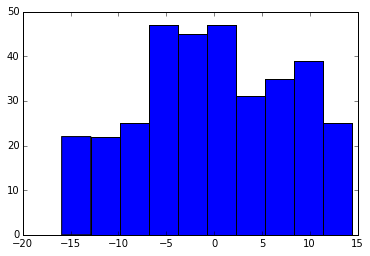

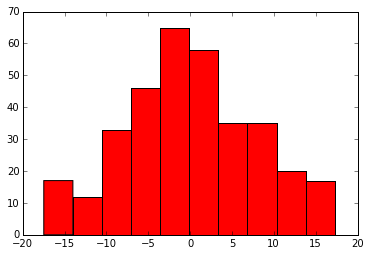

In [39]:
%matplotlib inline

# first reduced dimension
plt.hist(Y[:,0])
plt.show()

# second reduced dimension
plt.hist(Y[:,1], color = 'red')
plt.show()

In [84]:
import sklearn.cluster as sk

kmeans = sk.KMeans(n_clusters = 6)
kmeans.fit(Y)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

(array([ 77.,  52.,  54.,  67.,  39.,  49.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

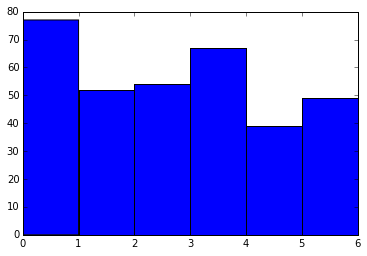

In [111]:
import pandas as pd
df = pd.DataFrame(index = range(1,339))
centers = map(float, kmeans.labels_)
df['cluster'] = kmeans.labels_

plt.hist(df.cluster.values, bins = 6, range = (0,6))

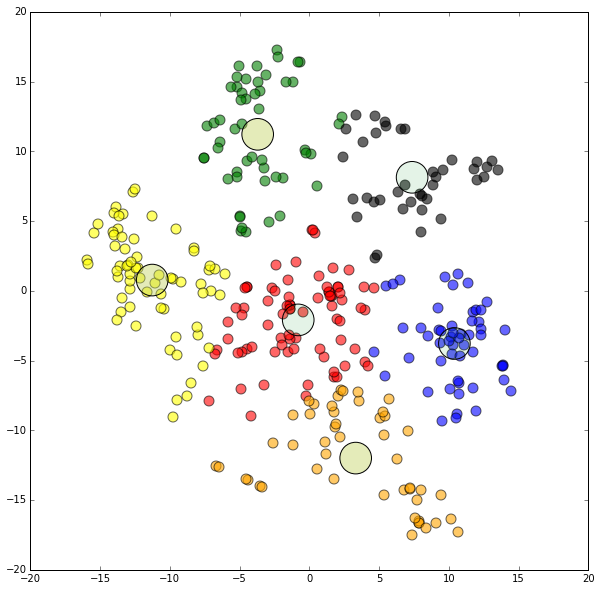

In [124]:
kc = kmeans.cluster_centers_

memb = Math.array(kmeans.labels_)

colors = ['red','green','blue','yellow','black','orange']
plt.figure(figsize=(10,10))
for i in range(6):
    ind = Math.where(memb==i)
    Plot.scatter(Y[ind,0], Y[ind,1], 100, colors[i], alpha = 0.6)
# Plot.scatter(Y[:,0], Y[:,1], 100, [[0.65, 0.32, 0.5, 0.2]])
Plot.scatter(kc[:,0], kc[:,1], 1000, [[0.15, 0.62, 0.25, 0.12], [0.75, 0.82, 0.35, 0.42]])